# DATASET INFORMATION

There are 38 classes of plant disease images which contain 70295 images in the training set and 17572 in the valid set.

Each class contains an average of 1700-1800 number of images to work on.

Each image is of size (256,256,3).


# Step 1: Importing the dataset

In [ ]:
import numpy as np
import pandas as pd
import tensorflow as tf
import keras
import os
import matplotlib.pyplot as plt
from PIL import Image

In [ ]:
import tensorflow
from tensorflow import keras
from keras.models import Sequential,load_model,Model
from keras.layers import Conv2D,MaxPool2D,AveragePooling2D,Dense,Flatten,ZeroPadding2D,BatchNormalization,Activation,Add,Input,Dropout,GlobalAveragePooling2D
from keras.optimizers import SGD
from keras.initializers import glorot_uniform
from keras.preprocessing.image import ImageDataGenerator
from keras.callbacks import ModelCheckpoint,EarlyStopping,ReduceLROnPlateau
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.applications.resnet50 import preprocess_input
from tensorflow.keras.layers import Dropout
from keras.layers import LeakyReLU
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.resnet50 import preprocess_input, decode_predictions


In [ ]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"shwetha1601","key":"e8e9990dad4114273fb8cec8f6611146"}'}

In [ ]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/

In [ ]:
!chmod 600 ~/.kaggle/kaggle.json

In [ ]:
!kaggle datasets download -d vipoooool/new-plant-diseases-dataset

 99% 2.68G/2.70G [00:24<00:00, 180MB/s]
100% 2.70G/2.70G [00:24<00:00, 117MB/s]


In [ ]:
!ls

kaggle.json  new-plant-diseases-dataset.zip  sample_data


In [ ]:
import zipfile
path='data/plant'
with zipfile.ZipFile('new-plant-diseases-dataset.zip','r') as z:
  z.extractall(path)

In [ ]:
!ls "/content/data"

plant


In [ ]:
!ls "/content/data/plant/New Plant Diseases Dataset(Augmented)"

'New Plant Diseases Dataset(Augmented)'


In [ ]:
!ls "/content/data/plant/New Plant Diseases Dataset(Augmented)/New Plant Diseases Dataset(Augmented)/train"

 Apple___Apple_scab
 Apple___Black_rot
 Apple___Cedar_apple_rust
 Apple___healthy
 Blueberry___healthy
'Cherry_(including_sour)___healthy'
'Cherry_(including_sour)___Powdery_mildew'
'Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot'
'Corn_(maize)___Common_rust_'
'Corn_(maize)___healthy'
'Corn_(maize)___Northern_Leaf_Blight'
 Grape___Black_rot
'Grape___Esca_(Black_Measles)'
 Grape___healthy
'Grape___Leaf_blight_(Isariopsis_Leaf_Spot)'
'Orange___Haunglongbing_(Citrus_greening)'
 Peach___Bacterial_spot
 Peach___healthy
 Pepper,_bell___Bacterial_spot
 Pepper,_bell___healthy
 Potato___Early_blight
 Potato___healthy
 Potato___Late_blight
 Raspberry___healthy
 Soybean___healthy
 Squash___Powdery_mildew
 Strawberry___healthy
 Strawberry___Leaf_scorch
 Tomato___Bacterial_spot
 Tomato___Early_blight
 Tomato___healthy
 Tomato___Late_blight
 Tomato___Leaf_Mold
 Tomato___Septoria_leaf_spot
'Tomato___Spider_mites Two-spotted_spider_mite'
 Tomato___Target_Spot
 Tomato___Tomato_mosaic_virus
 Tomato_

In [ ]:
!ls "/content/data/plant/New Plant Diseases Dataset(Augmented)/New Plant Diseases Dataset(Augmented)/valid"

 Apple___Apple_scab
 Apple___Black_rot
 Apple___Cedar_apple_rust
 Apple___healthy
 Blueberry___healthy
'Cherry_(including_sour)___healthy'
'Cherry_(including_sour)___Powdery_mildew'
'Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot'
'Corn_(maize)___Common_rust_'
'Corn_(maize)___healthy'
'Corn_(maize)___Northern_Leaf_Blight'
 Grape___Black_rot
'Grape___Esca_(Black_Measles)'
 Grape___healthy
'Grape___Leaf_blight_(Isariopsis_Leaf_Spot)'
'Orange___Haunglongbing_(Citrus_greening)'
 Peach___Bacterial_spot
 Peach___healthy
 Pepper,_bell___Bacterial_spot
 Pepper,_bell___healthy
 Potato___Early_blight
 Potato___healthy
 Potato___Late_blight
 Raspberry___healthy
 Soybean___healthy
 Squash___Powdery_mildew
 Strawberry___healthy
 Strawberry___Leaf_scorch
 Tomato___Bacterial_spot
 Tomato___Early_blight
 Tomato___healthy
 Tomato___Late_blight
 Tomato___Leaf_Mold
 Tomato___Septoria_leaf_spot
'Tomato___Spider_mites Two-spotted_spider_mite'
 Tomato___Target_Spot
 Tomato___Tomato_mosaic_virus
 Tomato_

# Loading the dataset

In [ ]:
data_dir_whole= "/content/data/plant/New Plant Diseases Dataset(Augmented)/New Plant Diseases Dataset(Augmented)"
train_dir_whole = data_dir_whole + "/train"
valid_dir_whole = data_dir_whole + "/valid"
diseases = os.listdir(train_dir_whole )

In [ ]:
# printing the disease names
print(diseases)

['Potato___healthy', 'Peach___Bacterial_spot', 'Grape___healthy', 'Blueberry___healthy', 'Raspberry___healthy', 'Orange___Haunglongbing_(Citrus_greening)', 'Tomato___Spider_mites Two-spotted_spider_mite', 'Squash___Powdery_mildew', 'Tomato___Tomato_mosaic_virus', 'Apple___Cedar_apple_rust', 'Grape___Esca_(Black_Measles)', 'Apple___healthy', 'Tomato___Target_Spot', 'Grape___Leaf_blight_(Isariopsis_Leaf_Spot)', 'Cherry_(including_sour)___Powdery_mildew', 'Peach___healthy', 'Tomato___Early_blight', 'Potato___Late_blight', 'Tomato___Septoria_leaf_spot', 'Pepper,_bell___Bacterial_spot', 'Apple___Apple_scab', 'Strawberry___Leaf_scorch', 'Tomato___Late_blight', 'Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot', 'Tomato___healthy', 'Potato___Early_blight', 'Soybean___healthy', 'Tomato___Tomato_Yellow_Leaf_Curl_Virus', 'Apple___Black_rot', 'Strawberry___healthy', 'Corn_(maize)___Common_rust_', 'Tomato___Bacterial_spot', 'Grape___Black_rot', 'Corn_(maize)___healthy', 'Cherry_(including_sour)_

In [ ]:
print("Total disease classes are: {}".format(len(diseases)))

Total disease classes are: 38


## Extracting the number of unique plants and number of unique diseases

In [ ]:
plants = []
NumberOfDiseases = 0
for plant in diseases:
    if plant.split('___')[0] not in plants:
        plants.append(plant.split('___')[0])
    if plant.split('___')[1] != 'healthy':
        NumberOfDiseases += 1

In [ ]:
print(f"Unique Plants are: \n{plants}")

Unique Plants are: 
['Potato', 'Peach', 'Grape', 'Blueberry', 'Raspberry', 'Orange', 'Tomato', 'Squash', 'Apple', 'Cherry_(including_sour)', 'Pepper,_bell', 'Strawberry', 'Corn_(maize)', 'Soybean']


In [ ]:
print("Number of plants: {}".format(len(plants)))

Number of plants: 14


Inference:
There are  14 leaf plants and while excluding healthy leaves, we have 26 types of images that show a particular disease in a particular plant.

## Checking number of images for each disease

In [ ]:
nums = {}
for disease in diseases:
    nums[disease] = len(os.listdir(train_dir_whole + '/' + disease))

img_per_class = pd.DataFrame(nums.values(), index=nums.keys(), columns=["no. of images"]) #index- plant name, column - no. of images
img_per_class

,no. of images
Potato___healthy,1824
Peach___Bacterial_spot,1838
Grape___healthy,1692
Blueberry___healthy,1816
Raspberry___healthy,1781
Orange___Haunglongbing_(Citrus_greening),2010
Tomato___Spider_mites Two-spotted_spider_mite,1741
Squash___Powdery_mildew,1736
Tomato___Tomato_mosaic_virus,1790
Apple___Cedar_apple_rust,1760


## Modifying the dataset and deleting directories to get the plants to be worked on - APPLE, POTATO, CHERRY, CORN, GRAPES, and TOMATOES

In [ ]:
import glob
import shutil

In [ ]:
# Defining the directories
train_dir_whole = "/content/data/plant/New Plant Diseases Dataset(Augmented)/New Plant Diseases Dataset(Augmented)/train"
valid_dir_whole = "/content/data/plant/New Plant Diseases Dataset(Augmented)/New Plant Diseases Dataset(Augmented)/valid"

In [ ]:
# List of directories to delete
folders_to_delete = [
    glob.glob(train_dir_whole + "/Blueberry___healthy") + glob.glob(valid_dir_whole + "/Blueberry___healthy"),
    glob.glob(train_dir_whole + "/Orange___Haunglongbing_(Citrus_greening)") + glob.glob(valid_dir_whole + "/Orange___Haunglongbing_(Citrus_greening)"),
    glob.glob(train_dir_whole + "/Peach___Bacterial_spot") + glob.glob(valid_dir_whole + "/Peach___Bacterial_spot"),
    glob.glob(train_dir_whole + "/Peach___healthy") + glob.glob(valid_dir_whole + "/Peach___healthy"),
    glob.glob(train_dir_whole + "/Pepper,_bell___Bacterial_spot") + glob.glob(valid_dir_whole + "/Pepper,_bell___Bacterial_spot"),
    glob.glob(train_dir_whole + "/Pepper,_bell___healthy") + glob.glob(valid_dir_whole + "/Pepper,_bell___healthy"),
    glob.glob(train_dir_whole + "/Raspberry___healthy") + glob.glob(valid_dir_whole + "/Raspberry___healthy"),
    glob.glob(train_dir_whole + "/Soybean___healthy") + glob.glob(valid_dir_whole + "/Soybean___healthy"),
    glob.glob(train_dir_whole + "/Squash___Powdery_mildew") + glob.glob(valid_dir_whole + "/Squash___Powdery_mildew"),
    glob.glob(train_dir_whole + "/Strawberry___Leaf_scorch") + glob.glob(valid_dir_whole + "/Strawberry___Leaf_scorch"),
    glob.glob(train_dir_whole + "/Strawberry___healthy") + glob.glob(valid_dir_whole + "/Strawberry___healthy")
]


In [ ]:
# Flattening the list of directories
folders_to_delete = [item for sublist in folders_to_delete for item in sublist]

In [ ]:
# List to store deleted directories
deleted_directories = []

# Deleting the directories and storing the deleted directories to check
for folder in folders_to_delete:
    try:
        shutil.rmtree(folder)
        deleted_directories.append(folder)
        print(f"Deleted folder: {folder}")
    except Exception as e:
        print(f"Failed to delete folder {folder}: {e}")


Deleted folder: /content/data/plant/New Plant Diseases Dataset(Augmented)/New Plant Diseases Dataset(Augmented)/train/Blueberry___healthy
Deleted folder: /content/data/plant/New Plant Diseases Dataset(Augmented)/New Plant Diseases Dataset(Augmented)/valid/Blueberry___healthy
Deleted folder: /content/data/plant/New Plant Diseases Dataset(Augmented)/New Plant Diseases Dataset(Augmented)/train/Orange___Haunglongbing_(Citrus_greening)
Deleted folder: /content/data/plant/New Plant Diseases Dataset(Augmented)/New Plant Diseases Dataset(Augmented)/valid/Orange___Haunglongbing_(Citrus_greening)
Deleted folder: /content/data/plant/New Plant Diseases Dataset(Augmented)/New Plant Diseases Dataset(Augmented)/train/Peach___Bacterial_spot
Deleted folder: /content/data/plant/New Plant Diseases Dataset(Augmented)/New Plant Diseases Dataset(Augmented)/valid/Peach___Bacterial_spot
Deleted folder: /content/data/plant/New Plant Diseases Dataset(Augmented)/New Plant Diseases Dataset(Augmented)/train/Peach_

In [ ]:
# Print the list of deleted directories
print("List of deleted directories:")
for directory in deleted_directories:
    print(directory)

List of deleted directories:
/content/data/plant/New Plant Diseases Dataset(Augmented)/New Plant Diseases Dataset(Augmented)/train/Blueberry___healthy
/content/data/plant/New Plant Diseases Dataset(Augmented)/New Plant Diseases Dataset(Augmented)/valid/Blueberry___healthy
/content/data/plant/New Plant Diseases Dataset(Augmented)/New Plant Diseases Dataset(Augmented)/train/Orange___Haunglongbing_(Citrus_greening)
/content/data/plant/New Plant Diseases Dataset(Augmented)/New Plant Diseases Dataset(Augmented)/valid/Orange___Haunglongbing_(Citrus_greening)
/content/data/plant/New Plant Diseases Dataset(Augmented)/New Plant Diseases Dataset(Augmented)/train/Peach___Bacterial_spot
/content/data/plant/New Plant Diseases Dataset(Augmented)/New Plant Diseases Dataset(Augmented)/valid/Peach___Bacterial_spot
/content/data/plant/New Plant Diseases Dataset(Augmented)/New Plant Diseases Dataset(Augmented)/train/Peach___healthy
/content/data/plant/New Plant Diseases Dataset(Augmented)/New Plant Disea

In [ ]:
# Print the list of directories in train_dir_whole after deletion
directories_in_train_dir = os.listdir(train_dir_whole)

print("List of directories in train_dir_whole:")
for directory in directories_in_train_dir:
    print(directory)

List of directories in train_dir_whole:
Potato___healthy
Grape___healthy
Tomato___Spider_mites Two-spotted_spider_mite
Tomato___Tomato_mosaic_virus
Apple___Cedar_apple_rust
Grape___Esca_(Black_Measles)
Apple___healthy
Tomato___Target_Spot
Grape___Leaf_blight_(Isariopsis_Leaf_Spot)
Cherry_(including_sour)___Powdery_mildew
Tomato___Early_blight
Potato___Late_blight
Tomato___Septoria_leaf_spot
Apple___Apple_scab
Tomato___Late_blight
Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot
Tomato___healthy
Potato___Early_blight
Tomato___Tomato_Yellow_Leaf_Curl_Virus
Apple___Black_rot
Corn_(maize)___Common_rust_
Tomato___Bacterial_spot
Grape___Black_rot
Corn_(maize)___healthy
Cherry_(including_sour)___healthy
Tomato___Leaf_Mold
Corn_(maize)___Northern_Leaf_Blight


### Checking if the classes are balanced using charts

1. Pie chart

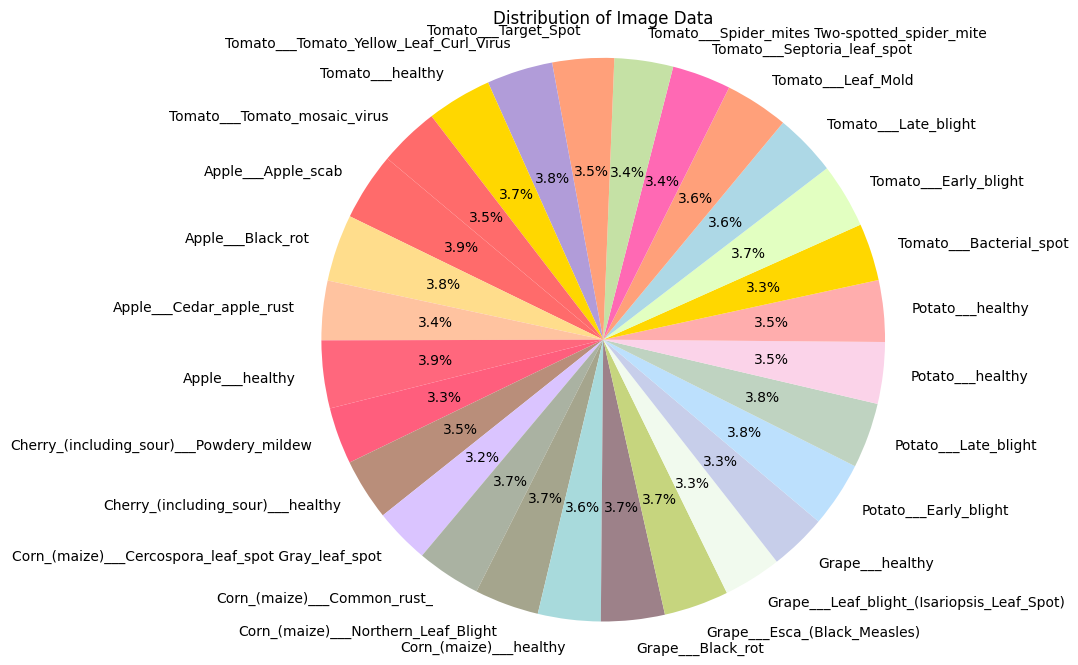

In [ ]:
import os
import matplotlib.pyplot as plt

# Assuming you have the class directory paths
class_directories = [
    "/content/data/plant/new plant diseases dataset(augmented)/New Plant Diseases Dataset(Augmented)/train/Apple___Apple_scab",
    "/content/data/plant/new plant diseases dataset(augmented)/New Plant Diseases Dataset(Augmented)/train/Apple___Black_rot",
    "/content/data/plant/new plant diseases dataset(augmented)/New Plant Diseases Dataset(Augmented)/train/Apple___Cedar_apple_rust",
    "/content/data/plant/new plant diseases dataset(augmented)/New Plant Diseases Dataset(Augmented)/train/Apple___healthy",
    "/content/data/plant/new plant diseases dataset(augmented)/New Plant Diseases Dataset(Augmented)/train/Cherry_(including_sour)___Powdery_mildew",
    "/content/data/plant/new plant diseases dataset(augmented)/New Plant Diseases Dataset(Augmented)/train/Cherry_(including_sour)___healthy",
    "/content/data/plant/new plant diseases dataset(augmented)/New Plant Diseases Dataset(Augmented)/train/Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot",
    "/content/data/plant/new plant diseases dataset(augmented)/New Plant Diseases Dataset(Augmented)/train/Corn_(maize)___Common_rust_",
    "/content/data/plant/new plant diseases dataset(augmented)/New Plant Diseases Dataset(Augmented)/train/Corn_(maize)___Northern_Leaf_Blight",
    "/content/data/plant/new plant diseases dataset(augmented)/New Plant Diseases Dataset(Augmented)/train/Corn_(maize)___healthy",
    "/content/data/plant/new plant diseases dataset(augmented)/New Plant Diseases Dataset(Augmented)/train/Grape___Black_rot",
    "/content/data/plant/new plant diseases dataset(augmented)/New Plant Diseases Dataset(Augmented)/train/Grape___Esca_(Black_Measles)",
    "/content/data/plant/new plant diseases dataset(augmented)/New Plant Diseases Dataset(Augmented)/train/Grape___Leaf_blight_(Isariopsis_Leaf_Spot)",
    "/content/data/plant/new plant diseases dataset(augmented)/New Plant Diseases Dataset(Augmented)/train/Grape___healthy",
    "/content/data/plant/new plant diseases dataset(augmented)/New Plant Diseases Dataset(Augmented)/train/Potato___Early_blight",
    "/content/data/plant/new plant diseases dataset(augmented)/New Plant Diseases Dataset(Augmented)/train/Potato___Late_blight",
    "/content/data/plant/new plant diseases dataset(augmented)/New Plant Diseases Dataset(Augmented)/train/Potato___healthy",
    "/content/data/plant/new plant diseases dataset(augmented)/New Plant Diseases Dataset(Augmented)/train/Potato___healthy",
    "/content/data/plant/new plant diseases dataset(augmented)/New Plant Diseases Dataset(Augmented)/train/Tomato___Bacterial_spot",
    "/content/data/plant/new plant diseases dataset(augmented)/New Plant Diseases Dataset(Augmented)/train/Tomato___Early_blight",
    "/content/data/plant/new plant diseases dataset(augmented)/New Plant Diseases Dataset(Augmented)/train/Tomato___Late_blight",
    "/content/data/plant/new plant diseases dataset(augmented)/New Plant Diseases Dataset(Augmented)/train/Tomato___Leaf_Mold",
    "/content/data/plant/new plant diseases dataset(augmented)/New Plant Diseases Dataset(Augmented)/train/Tomato___Septoria_leaf_spot",
    "/content/data/plant/new plant diseases dataset(augmented)/New Plant Diseases Dataset(Augmented)/train/Tomato___Spider_mites Two-spotted_spider_mite",
    "/content/data/plant/new plant diseases dataset(augmented)/New Plant Diseases Dataset(Augmented)/train/Tomato___Target_Spot",
    "/content/data/plant/new plant diseases dataset(augmented)/New Plant Diseases Dataset(Augmented)/train/Tomato___Tomato_Yellow_Leaf_Curl_Virus",
    "/content/data/plant/new plant diseases dataset(augmented)/New Plant Diseases Dataset(Augmented)/train/Tomato___healthy",
    "/content/data/plant/new plant diseases dataset(augmented)/New Plant Diseases Dataset(Augmented)/train/Tomato___Tomato_mosaic_virus"
    # Add paths for all 27 classes
]

# Get class labels from directory names
class_labels = [os.path.basename(directory) for directory in class_directories]

# Get the number of images in each class
class_counts = [len(os.listdir(directory)) for directory in class_directories]

colors = ["#FF6B6B", "#FFDD8C", "#FFC3A0", "#FF677D", "#FF5E7D", "#B98E7A", "#DAC4FF", "#AAB2A2", "#A5A58D", "#A8DADC", "#9D8189", "#C6D57E", "#F1FAEE", "#C7CEEA", "#BCE0FD", "#BFD3C1", "#FBD3E9", "#FFADAD", "#FFD700", "#E2FFC1", "#ADD8E6", "#FFA07A", "#FF69B4", "#C5E1A5", "#FFA07A", "#B19CD9", "#FFD700"
]

# Create a pie chart
plt.figure(figsize=(8, 8))
plt.pie(class_counts, labels=class_labels, autopct='%1.1f%%', startangle=140, colors=colors)
plt.title('Distribution of Image Data')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

plt.show()


2. Bar Chart

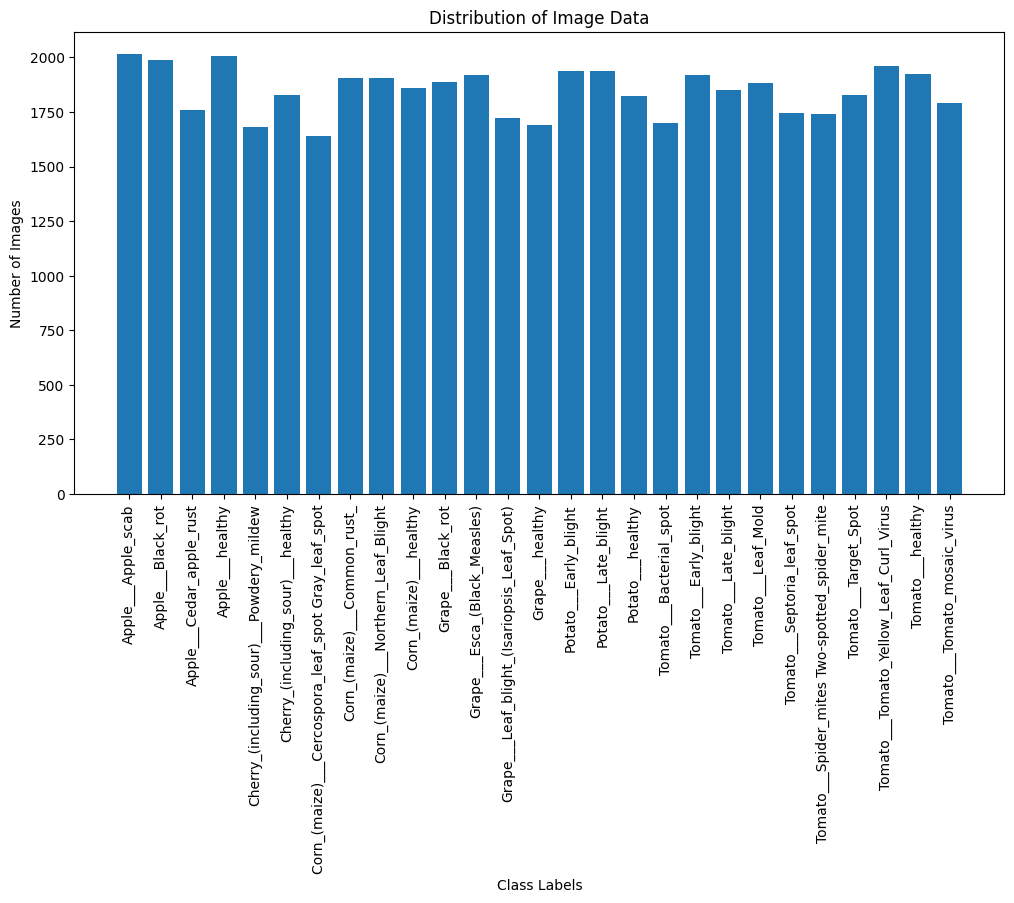

In [ ]:
import os
import matplotlib.pyplot as plt

# Assuming you have the class directory paths
class_directories = [
    "/content/data/plant/new plant diseases dataset(augmented)/New Plant Diseases Dataset(Augmented)/train/Apple___Apple_scab",
    "/content/data/plant/new plant diseases dataset(augmented)/New Plant Diseases Dataset(Augmented)/train/Apple___Black_rot",
    "/content/data/plant/new plant diseases dataset(augmented)/New Plant Diseases Dataset(Augmented)/train/Apple___Cedar_apple_rust",
    "/content/data/plant/new plant diseases dataset(augmented)/New Plant Diseases Dataset(Augmented)/train/Apple___healthy",
    "/content/data/plant/new plant diseases dataset(augmented)/New Plant Diseases Dataset(Augmented)/train/Cherry_(including_sour)___Powdery_mildew",
    "/content/data/plant/new plant diseases dataset(augmented)/New Plant Diseases Dataset(Augmented)/train/Cherry_(including_sour)___healthy",
    "/content/data/plant/new plant diseases dataset(augmented)/New Plant Diseases Dataset(Augmented)/train/Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot",
    "/content/data/plant/new plant diseases dataset(augmented)/New Plant Diseases Dataset(Augmented)/train/Corn_(maize)___Common_rust_",
    "/content/data/plant/new plant diseases dataset(augmented)/New Plant Diseases Dataset(Augmented)/train/Corn_(maize)___Northern_Leaf_Blight",
    "/content/data/plant/new plant diseases dataset(augmented)/New Plant Diseases Dataset(Augmented)/train/Corn_(maize)___healthy",
    "/content/data/plant/new plant diseases dataset(augmented)/New Plant Diseases Dataset(Augmented)/train/Grape___Black_rot",
    "/content/data/plant/new plant diseases dataset(augmented)/New Plant Diseases Dataset(Augmented)/train/Grape___Esca_(Black_Measles)",
    "/content/data/plant/new plant diseases dataset(augmented)/New Plant Diseases Dataset(Augmented)/train/Grape___Leaf_blight_(Isariopsis_Leaf_Spot)",
    "/content/data/plant/new plant diseases dataset(augmented)/New Plant Diseases Dataset(Augmented)/train/Grape___healthy",
    "/content/data/plant/new plant diseases dataset(augmented)/New Plant Diseases Dataset(Augmented)/train/Potato___Early_blight",
    "/content/data/plant/new plant diseases dataset(augmented)/New Plant Diseases Dataset(Augmented)/train/Potato___Late_blight",
    "/content/data/plant/new plant diseases dataset(augmented)/New Plant Diseases Dataset(Augmented)/train/Potato___healthy",
    "/content/data/plant/new plant diseases dataset(augmented)/New Plant Diseases Dataset(Augmented)/train/Potato___healthy",
    "/content/data/plant/new plant diseases dataset(augmented)/New Plant Diseases Dataset(Augmented)/train/Tomato___Bacterial_spot",
    "/content/data/plant/new plant diseases dataset(augmented)/New Plant Diseases Dataset(Augmented)/train/Tomato___Early_blight",
    "/content/data/plant/new plant diseases dataset(augmented)/New Plant Diseases Dataset(Augmented)/train/Tomato___Late_blight",
    "/content/data/plant/new plant diseases dataset(augmented)/New Plant Diseases Dataset(Augmented)/train/Tomato___Leaf_Mold",
    "/content/data/plant/new plant diseases dataset(augmented)/New Plant Diseases Dataset(Augmented)/train/Tomato___Septoria_leaf_spot",
    "/content/data/plant/new plant diseases dataset(augmented)/New Plant Diseases Dataset(Augmented)/train/Tomato___Spider_mites Two-spotted_spider_mite",
    "/content/data/plant/new plant diseases dataset(augmented)/New Plant Diseases Dataset(Augmented)/train/Tomato___Target_Spot",
    "/content/data/plant/new plant diseases dataset(augmented)/New Plant Diseases Dataset(Augmented)/train/Tomato___Tomato_Yellow_Leaf_Curl_Virus",
    "/content/data/plant/new plant diseases dataset(augmented)/New Plant Diseases Dataset(Augmented)/train/Tomato___healthy",
    "/content/data/plant/new plant diseases dataset(augmented)/New Plant Diseases Dataset(Augmented)/train/Tomato___Tomato_mosaic_virus"

    # Add paths for all 27 classes
]

# Get class labels from directory names
class_labels = [os.path.basename(directory) for directory in class_directories]

# Get the number of images in each class
class_counts = [len(os.listdir(directory)) for directory in class_directories]

# Create a histogram
plt.figure(figsize=(12, 6))
plt.bar(class_labels, class_counts)
plt.title('Distribution of Image Data')
plt.xlabel('Class Labels')
plt.ylabel('Number of Images')
plt.xticks(rotation=90)

plt.show()


### Defining class labels

In [ ]:
class_labels = class_labels = {
    0: 'Grape___Esca_(Black_Measles)',
    1: 'Corn_(maize)___Common_rust_',
    2: 'Tomato___Tomato_mosaic_virus',
    3: 'Corn_(maize)___healthy',
    4: 'Cherry_(including_sour)___Powdery_mildew',
    5: 'Potato___healthy',
    6: 'Tomato___Early_blight',
    7: 'Tomato___Septoria_leaf_spot',
    8: 'Tomato___Target_Spot',
    9: 'Tomato___Leaf_Mold',
    10: 'Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot',
    11: 'Grape___Black_rot',
    12: 'Apple___Apple_scab',
    13: 'Apple___Cedar_apple_rust',
    14: 'Potato___Late_blight',
    15: 'Apple___healthy',
    16: 'Potato___Early_blight',
    17: 'Grape___healthy',
    18: 'Grape___Leaf_blight_(Isariopsis_Leaf_Spot)',
    19: 'Apple___Black_rot',
    20: 'Tomato___Bacterial_spot',
    21: 'Tomato___Late_blight',
    22: 'Corn_(maize)___Northern_Leaf_Blight',
    23: 'Tomato___healthy',
    24: 'Cherry_(including_sour)___healthy',
    25: 'Tomato___Tomato_Yellow_Leaf_Curl_Virus',
    26: 'Tomato___Spider_mites Two-spotted_spider_mite'
}


## Loading the pre-trained ResNet50 model with pre-trained weights from ImageNet dataset

In [ ]:
# Load pre-trained ResNet50 model with weights from ImageNet dataset
base_model_tf=ResNet50(include_top=False,weights='imagenet',input_shape=(224,224,3),classes=27)

94765736/94765736 [==============================] - 0s 0us/step


### Defining the input layer

In [ ]:
pt = Input(shape=(224, 224, 3))

### Preprocessing the input

In [ ]:
func = tf.cast(pt, tf.float32)
x = preprocess_input(func) #This function used to zero-center each color channel wrt Imagenet dataset

### Defining the data generators

In [ ]:
train_datagen= ImageDataGenerator(shear_range=0.2,zoom_range=0.2,horizontal_flip=False,vertical_flip=False
                                  ,fill_mode='nearest',width_shift_range=0.2,height_shift_range=0.2)

val_datagen=ImageDataGenerator()

train= train_datagen.flow_from_directory(directory=train_dir_whole,batch_size=32,target_size=(224,224),
                                         color_mode='rgb',class_mode='categorical',seed=42)

valid=val_datagen.flow_from_directory(directory=valid_dir_whole,batch_size=32,target_size=(224,224),color_mode='rgb',class_mode='categorical')

Found 49865 images belonging to 27 classes.
Found 12465 images belonging to 27 classes.


### Defining the callbacks:

In [ ]:
#CallBacks
es=EarlyStopping(monitor='val_accuracy',verbose=1,patience=7,mode='auto')
mc=ModelCheckpoint(filepath='/content',monitor='val_accuracy',verbose=1,save_best_only=True)
lr=ReduceLROnPlateau(monitor='val_accuracy',verbose=1,patience=5,min_lr=0.001)

### Freezing Base Layer

In [ ]:
base_model_tf.trainable=False #freezes the layers of the base_model_tf so that they will not be updated or trained during the training process.

### Building model 1 with activation functions relu and output activation function softmax and optimzer- ADAM

In [ ]:
model_resnet = base_model_tf(x, training=False)
model_resnet = GlobalAveragePooling2D()(model_resnet)
model_resnet = Dense(128, activation='relu')(model_resnet)
model_resnet = Dense(64, activation='relu')(model_resnet)
model_resnet = Dense(27, activation='softmax')(model_resnet)

model1 = Model(inputs=pt, outputs=model_resnet)
model1.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 tf.cast (TFOpLambda)        (None, 224, 224, 3)       0         
                                                                 
 tf.__operators__.getitem (  (None, 224, 224, 3)       0         
 SlicingOpLambda)                                                
                                                                 
 tf.nn.bias_add (TFOpLambda  (None, 224, 224, 3)       0         
 )                                                               
                                                                 
 resnet50 (Functional)       (None, 7, 7, 2048)        23587712  
                                                                 
 global_average_pooling2d (  (None, 2048)              0     

In [ ]:
model1.compile(optimizer='Adam',loss='categorical_crossentropy',metrics=['accuracy'])

In [ ]:
history = model1.fit(train, validation_data=valid, epochs=10, steps_per_epoch=200, verbose=1, callbacks=[mc, es, lr])

Epoch 1/10
200/200 [==============================] - ETA: 0s - loss: 1.0839 - accuracy: 0.6956
Epoch 1: val_accuracy improved from -inf to 0.84116, saving model to /content
200/200 [==============================] - 196s 910ms/step - loss: 1.0839 - accuracy: 0.6956 - val_loss: 0.5020 - val_accuracy: 0.8412 - lr: 0.0010
Epoch 2/10
200/200 [==============================] - ETA: 0s - loss: 0.3639 - accuracy: 0.8833
Epoch 2: val_accuracy improved from 0.84116 to 0.89828, saving model to /content
200/200 [==============================] - 161s 806ms/step - loss: 0.3639 - accuracy: 0.8833 - val_loss: 0.3175 - val_accuracy: 0.8983 - lr: 0.0010
Epoch 3/10
200/200 [==============================] - ETA: 0s - loss: 0.2872 - accuracy: 0.9039
Epoch 3: val_accuracy improved from 0.89828 to 0.91408, saving model to /content
200/200 [==============================] - 159s 794ms/step - loss: 0.2872 - accuracy: 0.9039 - val_loss: 0.2592 - val_accuracy: 0.9141 - lr: 0.0010
Epoch 4/10
200/200 [========

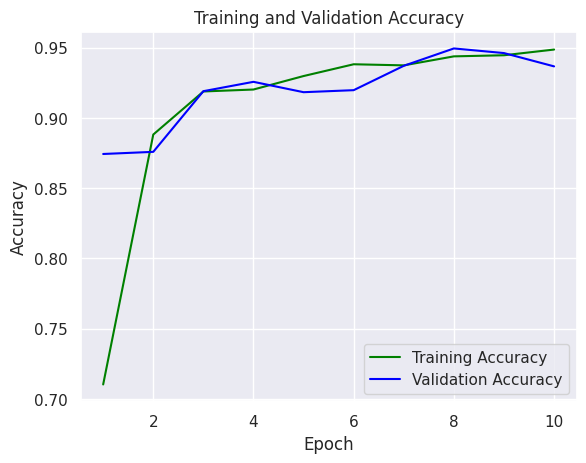

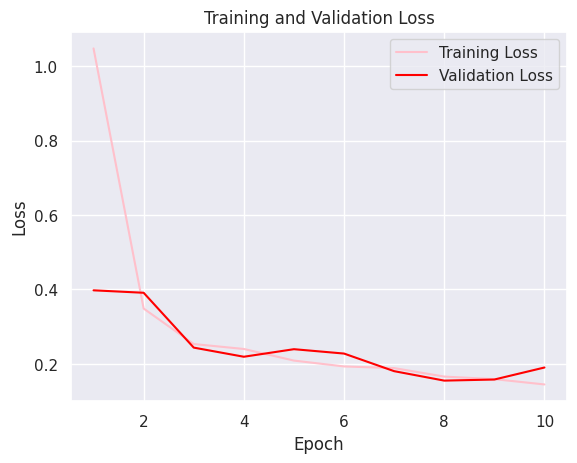

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(loss) + 1)

#accuracy plot
plt.plot(epochs, acc, color='green', label='Training Accuracy')
plt.plot(epochs, val_acc, color='blue', label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend()

plt.figure()
#loss plot
plt.plot(epochs, loss, color='pink', label='Training Loss')
plt.plot(epochs, val_loss, color='red', label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.show()

In [ ]:
model1.save("RESNET50_PLANT_DISEASE_model1.h5")

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


### Inference:

The model has not overfitted and the model has an accuracy of 95 %.

### Building model 2

In [ ]:
# Model building
base_model_tf.trainable = False
model_resnet = base_model_tf(x, training=False)
model_resnet = GlobalAveragePooling2D()(model_resnet)
model_resnet = Dense(128)(model_resnet)
model_resnet = LeakyReLU(alpha=0.1)(model_resnet)  # Leaky ReLU activation
model_resnet = Dense(64)(model_resnet)
model_resnet = LeakyReLU(alpha=0.1)(model_resnet)  # Leaky ReLU activation
model_resnet = Dense(27, activation='softmax')(model_resnet)

model2 = Model(inputs=pt, outputs=model_resnet)
model2.summary()


Model: "model_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_5 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 tf.cast_3 (TFOpLambda)      (None, 224, 224, 3)       0         
                                                                 
 tf.__operators__.getitem_3  (None, 224, 224, 3)       0         
  (SlicingOpLambda)                                              
                                                                 
 tf.nn.bias_add_3 (TFOpLamb  (None, 224, 224, 3)       0         
 da)                                                             
                                                                 
 resnet50 (Functional)       (None, 7, 7, 2048)        23587712  
                                                                 
 global_average_pooling2d_3  (None, 2048)              0   

In [ ]:
model2.compile(optimizer='Adam',loss='categorical_crossentropy',metrics=['accuracy'])

In [ ]:
history2= model2.fit(train,validation_data=valid,epochs=10,steps_per_epoch=200,verbose=1,callbacks=[mc,es,lr])

Epoch 1/10
200/200 [==============================] - ETA: 0s - loss: 0.1360 - accuracy: 0.9541
Epoch 1: val_accuracy improved from 0.95515 to 0.95636, saving model to /content
200/200 [==============================] - 155s 779ms/step - loss: 0.1360 - accuracy: 0.9541 - val_loss: 0.1298 - val_accuracy: 0.9564 - lr: 0.0010
Epoch 2/10
200/200 [==============================] - ETA: 0s - loss: 0.1276 - accuracy: 0.9553
Epoch 2: val_accuracy did not improve from 0.95636
200/200 [==============================] - 127s 633ms/step - loss: 0.1276 - accuracy: 0.9553 - val_loss: 0.1489 - val_accuracy: 0.9522 - lr: 0.0010
Epoch 3/10
200/200 [==============================] - ETA: 0s - loss: 0.1197 - accuracy: 0.9583
Epoch 3: val_accuracy did not improve from 0.95636
200/200 [==============================] - 127s 636ms/step - loss: 0.1197 - accuracy: 0.9583 - val_loss: 0.2317 - val_accuracy: 0.9288 - lr: 0.0010
Epoch 4/10
200/200 [==============================] - ETA: 0s - loss: 0.1313 - accura

Exception ignored in: <function _xla_gc_callback at 0x7e5ac5b0e950>
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/jax/_src/lib/__init__.py", line 97, in _xla_gc_callback
    def _xla_gc_callback(*args):
KeyboardInterrupt: 


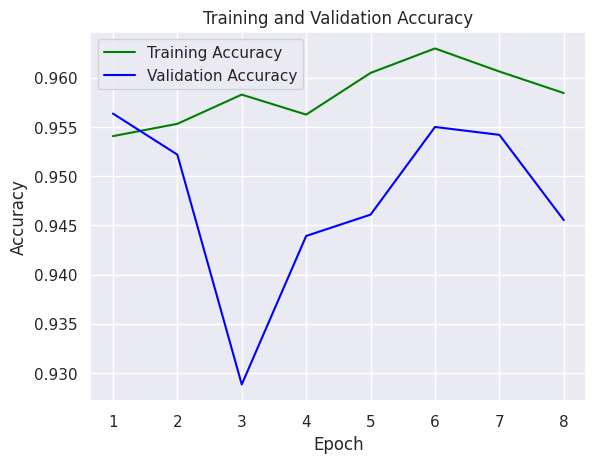

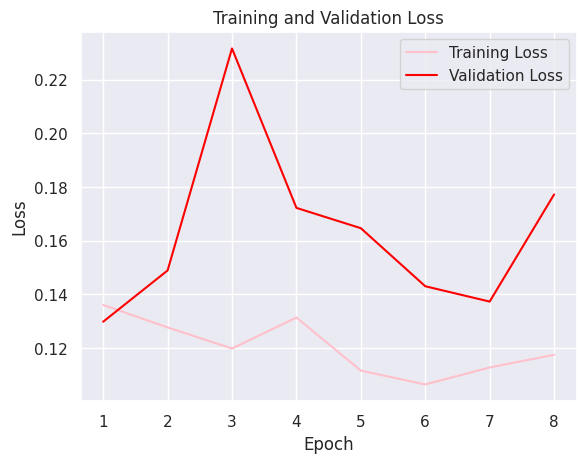

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

acc = history2.history['accuracy']
val_acc = history2.history['val_accuracy']
loss = history2.history['loss']
val_loss = history2.history['val_loss']
epochs = range(1, len(loss) + 1)

#accuracy plot
plt.plot(epochs, acc, color='green', label='Training Accuracy')
plt.plot(epochs, val_acc, color='blue', label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend()

plt.figure()
#loss plot
plt.plot(epochs, loss, color='pink', label='Training Loss')
plt.plot(epochs, val_loss, color='red', label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.show()

In [ ]:
model2.save("RESNET50_PLANT_DISEASE_model2.h5")

### Inference

The above graphs means that the model is performing very well on the training data, but not as well on the validation data. This suggests that the model is learning the noise in the training data and not generalizing well to new data.

### Building model 3 by changing the optimizer

In [ ]:
from tensorflow.keras.optimizers import RMSprop

In [ ]:
model_resnet=base_model_tf(x,training=False)
model_resnet=GlobalAveragePooling2D()(model_resnet)
model_resnet=Dense(128,activation='relu')(model_resnet)
model_resnet=Dropout(0.5)(model_resnet) # Add dropout with a rate of 0.5
model_resnet=Dense(64,activation='relu')(model_resnet)
model_resnet=Dropout(0.5)(model_resnet) # Add dropout with a rate of 0.5
model_resnet=Dense(27,activation='softmax')(model_resnet)

model3=Model(inputs=pt,outputs=model_resnet)
model3.summary()

model3.compile(optimizer='RMSprop', loss='categorical_crossentropy', metrics=['accuracy'])

Model: "model_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_5 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 tf.cast_3 (TFOpLambda)      (None, 224, 224, 3)       0         
                                                                 
 tf.__operators__.getitem_3  (None, 224, 224, 3)       0         
  (SlicingOpLambda)                                              
                                                                 
 tf.nn.bias_add_3 (TFOpLamb  (None, 224, 224, 3)       0         
 da)                                                             
                                                                 
 resnet50 (Functional)       (None, 7, 7, 2048)        23587712  
                                                                 
 global_average_pooling2d_6  (None, 2048)              0   

In [ ]:
history3= model3.fit(train,validation_data=valid,epochs=10,steps_per_epoch=200,verbose=1,callbacks=[mc,es,lr])

Epoch 1/10
200/200 [==============================] - ETA: 0s - loss: 2.8773 - accuracy: 0.1752
Epoch 1: val_accuracy did not improve from 0.95636
200/200 [==============================] - 136s 657ms/step - loss: 2.8773 - accuracy: 0.1752 - val_loss: 1.8875 - val_accuracy: 0.5815 - lr: 0.0010
Epoch 2/10
200/200 [==============================] - ETA: 0s - loss: 2.0644 - accuracy: 0.3661
Epoch 2: val_accuracy did not improve from 0.95636
200/200 [==============================] - 166s 830ms/step - loss: 2.0644 - accuracy: 0.3661 - val_loss: 1.0103 - val_accuracy: 0.7625 - lr: 0.0010
Epoch 3/10
200/200 [==============================] - ETA: 0s - loss: 1.6111 - accuracy: 0.4905
Epoch 3: val_accuracy did not improve from 0.95636
200/200 [==============================] - 126s 631ms/step - loss: 1.6111 - accuracy: 0.4905 - val_loss: 0.6964 - val_accuracy: 0.8189 - lr: 0.0010
Epoch 4/10
200/200 [==============================] - ETA: 0s - loss: 1.3637 - accuracy: 0.5656
Epoch 4: val_accura

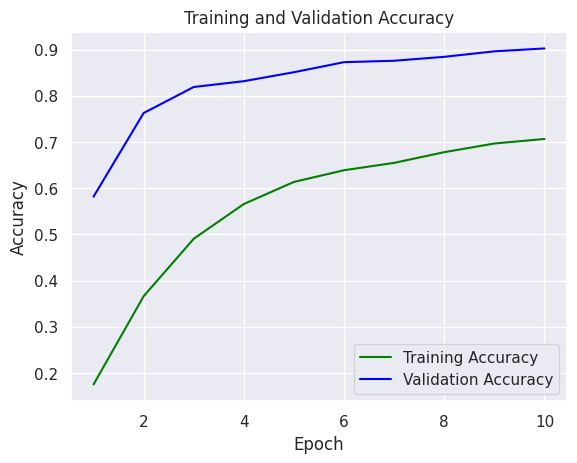

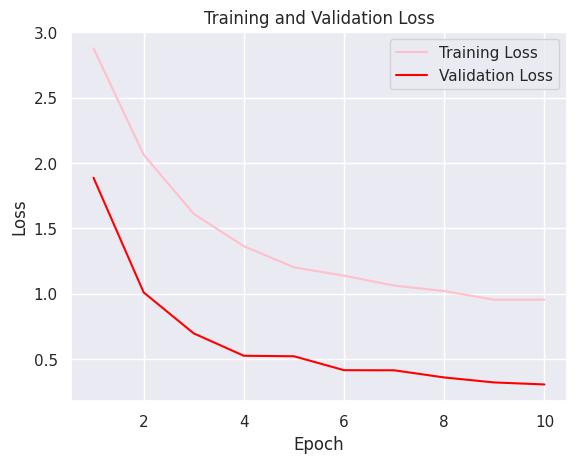

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

acc = history3.history['accuracy']
val_acc = history3.history['val_accuracy']
loss = history3.history['loss']
val_loss = history3.history['val_loss']
epochs = range(1, len(loss) + 1)

#accuracy plot
plt.plot(epochs, acc, color='green', label='Training Accuracy')
plt.plot(epochs, val_acc, color='blue', label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend()

plt.figure()
#loss plot
plt.plot(epochs, loss, color='pink', label='Training Loss')
plt.plot(epochs, val_loss, color='red', label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.show()

### Testing the best models for ResNet 50

#### Model 1

For a random image

1/1 [==============================] - 2s 2s/step


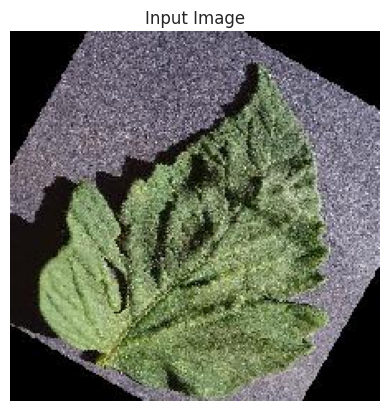

Predicted class index: 26
Predicted class label: Tomato___Spider_mites Two-spotted_spider_mite


In [ ]:
test_image_path = '/content/data/plant/test/test/TomatoHealthy3.JPG'  # Test image path
img = image.load_img(test_image_path, target_size=(224, 224))

# Convert the PIL image to a numpy array and preprocess it for the model
img_array = image.img_to_array(img)  # Converting the image to a numpy array
img_array = np.expand_dims(img_array, axis=0)
img_array = preprocess_input(img_array)  # Preprocessing the image for the model

predictions1 = model1.predict(img_array)
predicted_classes = np.argmax(predictions1, axis=1)  # Gets the class index with the highest probability
predicted_class_label = class_labels[predicted_classes[0]]

# Display the input image
plt.imshow(img)
plt.title('Input Image')
plt.axis('off')
plt.show()

print("Predicted class index:", predicted_classes[0])
print("Predicted class label:", predicted_class_label)


#### Model 3

For a random image

1/1 [==============================] - 0s 30ms/step


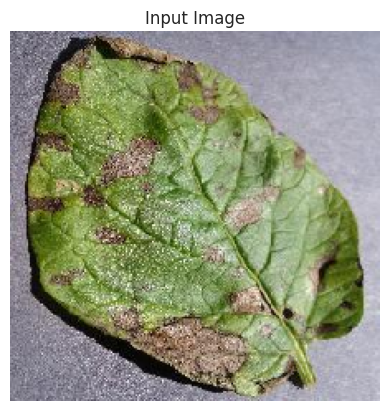

Predicted class index: 15
Predicted class label: Apple___healthy


In [ ]:
test_image_path = '/content/data/plant/test/test/PotatoEarlyBlight1.JPG'  # Test image path
img = image.load_img(test_image_path, target_size=(224, 224))

# Convert the PIL image to a numpy array and preprocess it for the model
img_array = image.img_to_array(img)  # Converting the image to a numpy array
img_array = np.expand_dims(img_array, axis=0)
img_array = preprocess_input(img_array)  # Preprocessing the image for the model

predictions1 = model1.predict(img_array)
predicted_classes = np.argmax(predictions1, axis=1)  # Gets the class index with the highest probability
predicted_class_label = class_labels[predicted_classes[0]]

# Display the input image
plt.imshow(img)
plt.title('Input Image')
plt.axis('off')
plt.show()

print("Predicted class index:", predicted_classes[0])
print("Predicted class label:", predicted_class_label)


### INFERENCE:


Due to lack of computational resources, the models do not perform well on the test data. More work needs to be done for a better performance.

### Performance metrics

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


Predictions for the test dataset:

In [ ]:
from keras.models import load_model
from keras.preprocessing import image
import numpy as np
import os


In [ ]:
model1 = load_model('RESNET50_PLANT_DISEASE_model1.h5')

In [ ]:
test_dir='/content/drive/MyDrive/DL project/test'

In [ ]:
def predict_test_images(test_dir, model):
    predictions = []
    for folder in os.listdir(test_dir):
        folder_path = os.path.join(test_dir, folder)
        if os.path.isdir(folder_path):
            for img_file in os.listdir(folder_path):
                img_path = os.path.join(folder_path, img_file)
                try:
                    img = Image.open(img_path)
                    img = img.resize((224, 224))  # Resize the image
                    img_array = image.img_to_array(img)
                    img_array = np.expand_dims(img_array, axis=0)
                    prediction = model.predict(img_array)
                    predicted_class = np.argmax(prediction)
                    predicted_label = class_labels[predicted_class]
                    predictions.append(predicted_label)
                except (UnidentifiedImageError, OSError):
                    print(f"Skipping {img_path} due to UnidentifiedImageError or OSError")
    return predictions


In [ ]:
test_predictions = predict_test_images(test_dir, model1)
print(test_predictions)


1/1 [==============================] - 0s 38ms/step
['Potato___Early_blight', 'Potato___Early_blight', 'Potato___Late_blight', 'Potato___Late_blight', 'Potato___Late_blight', 'Potato___Late_blight', 'Potato___Late_blight', 'Tomato___Septoria_leaf_spot', 'Tomato___Septoria_leaf_spot', 'Tomato___Septoria_leaf_spot', 'Grape___Leaf_blight_(Isariopsis_Leaf_Spot)', 'Grape___Leaf_blight_(Isariopsis_Leaf_Spot)', 'Grape___Leaf_blight_(Isariopsis_Leaf_Spot)', 'Apple___Black_rot', 'Corn_(maize)___Northern_Leaf_Blight', 'Grape___Leaf_blight_(Isariopsis_Leaf_Spot)', 'Grape___Esca_(Black_Measles)', 'Grape___Esca_(Black_Measles)', 'Grape___Esca_(Black_Measles)', 'Tomato___Spider_mites Two-spotted_spider_mite', 'Tomato___Spider_mites Two-spotted_spider_mite', 'Tomato___Spider_mites Two-spotted_spider_mite', 'Tomato___healthy', 'Cherry_(including_sour)___healthy', 'Cherry_(including_sour)___healthy', 'Cherry_(including_sour)___healthy', 'Cherry_(including_sour)___healthy', 'Cherry_(including_sour)___he

In [ ]:
# Print unique classes in true_labels
print("Unique classes in true_labels:", set(true_labels))

# Print keys in class_labels dictionary
print("Keys in class_labels dictionary:", set(class_labels.keys()))


Unique classes in true_labels: {'Apple___Cedar_apple_rust', 'Tomato___Tomato_Yellow_Leaf_Curl_Virus', 'Tomato___healthy', 'Corn_(maize)___Common_rust_', 'Potato___healthy', 'Potato___Early_blight', 'Tomato___Early_blight', 'Apple___Apple_scab'}
Keys in class_labels dictionary: {0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26}


In [ ]:
predicted_labels = [
    'Potato___Early_blight', 'Potato___Early_blight', 'Potato___Late_blight', 'Potato___Late_blight',
    'Potato___Late_blight', 'Potato___Late_blight', 'Potato___Late_blight', 'Tomato___Septoria_leaf_spot',
    'Tomato___Septoria_leaf_spot', 'Tomato___Septoria_leaf_spot', 'Grape___Leaf_blight_(Isariopsis_Leaf_Spot)',
    'Grape___Leaf_blight_(Isariopsis_Leaf_Spot)', 'Grape___Leaf_blight_(Isariopsis_Leaf_Spot)', 'Apple___Black_rot',
    'Corn_(maize)___Northern_Leaf_Blight', 'Grape___Leaf_blight_(Isariopsis_Leaf_Spot)', 'Grape___Esca_(Black_Measles)',
    'Grape___Esca_(Black_Measles)', 'Grape___Esca_(Black_Measles)', 'Tomato___Spider_mites Two-spotted_spider_mite',
    'Tomato___Spider_mites Two-spotted_spider_mite', 'Tomato___Spider_mites Two-spotted_spider_mite', 'Tomato___healthy',
    'Cherry_(including_sour)___healthy', 'Cherry_(including_sour)___healthy', 'Cherry_(including_sour)___healthy',
    'Cherry_(including_sour)___healthy', 'Cherry_(including_sour)___healthy', 'Cherry_(including_sour)___healthy',
    'Tomato___Tomato_mosaic_virus', 'Tomato___Tomato_mosaic_virus', 'Tomato___Tomato_mosaic_virus',
    'Tomato___Tomato_mosaic_virus'
]

The true labels for the test dataset

In [ ]:
true_classes = test_generator.classes
class_labels = list(test_generator.class_indices.keys())
class_labels = [class_labels[i] for i in range(len(class_labels))]

Accuracy:

In [ ]:
accuracy = np.mean(predicted_classes == true_classes)
print("Accuracy:", accuracy)

Precision, recall, F1-score, and support

In [ ]:
print("Classification Report:")
print(classification_report(true_classes, predicted_classes, target_names=class_labels))

The True Positive Rate (TPR) and False Positive Rate (FPR)

In [ ]:
confusion = confusion_matrix(true_classes, predicted_classes)
TP = np.diag(confusion)
FP = confusion.sum(axis=0) - TP
FN = confusion.sum(axis=1) - TP
TN = confusion.sum() - (FP + FN + TP)

TPR = TP / (TP + FN)
FPR = FP / (FP + TN)

print("True Positive Rate (TPR):", TPR)
print("False Positive Rate (FPR):", FPR)

NOTE:

The code for accuracy, precision, F1 score, TPR, FPR and the classification matrix is in this file.

However, due to the runtime error, the codes could not be exectued for both the models.